<a href="https://colab.research.google.com/github/Fuljam/kk/blob/master/TareaSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analytics Aplicado a los Negocios con Python**

**Trabajo Práctico 1**

Integrantes: Mauricio Acuña, Martín Majluf, Joaquín Prieto, Alegna Rada y Felipe Sepúlveda.

A continuación se importan las librerías y algunos comandos a utilizar.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy import stats

1. Se carga la base de datos.

In [ ]:
data = pd.read_csv('real_estate.csv')

2. Se obtiene la estadística descriptiva.

In [ ]:
data.describe()

,precio,N_dormitorios,N_banos,superficie
count,581.000000,581.000000,581.000000,581.000000
mean,12.664251,2.573150,1.614458,68.371429
std,5.048692,0.873105,0.701769,31.440850
min,4.710000,1.000000,1.000000,21.000000
25%,9.860000,2.000000,1.000000,50.000000
50%,11.510000,3.000000,2.000000,60.000000
75%,13.890000,3.000000,2.000000,78.000000
max,51.590000,6.000000,4.000000,350.000000


En estos estadísticos  se pueden ver medias,errores estándar, percentiles, minimos y máximos. Las medias para el precio es 12,67 UF/mt2, dormitorios 2,57-3 y 2 baños.Aunque si analizamos la densidad y distribción de los datos no se ajustan a la normal, por lo que no so n tan explicativas.
La propiedad típica en la muestra tiene un precio de 12, 67 UF/M2
, menos de 3 dormitorios, 2 baños y 68, 37 de superficie.

50% de los precios se distribuyen entre 10 y 20UF/M2 . Algunas
propiedades tienen precios superiores hasta un máximo de 51,59 UF/M2
. El 50%  de propiedades tiene una superficie que no supera los 100
M2, sin embargo llegan hasta un máximo de 350.


Esto lo podemos complementar con la asimetría y la kurtosis.

In [ ]:
print("La curtosis para cada variable se describe a continuación\n", data.kurtosis())
print("La asimetría para cada variable se describe a continuación\n", data.skew())

La curtosis para cada variable se describe a continuación
 precio           14.422539
N_dormitorios     1.026295
N_banos           0.502774
superficie       13.653649
dtype: float64
La asimetría para cada variable se describe a continuación
 precio           2.881862
N_dormitorios    0.211512
N_banos          0.939482
superficie       2.614858
dtype: float64


Esto da cuenta de la no normalidad de los datos, principalmente para precio y superficie, que tienen curtosis del orden de 13 y 14, siendo que la distribución normal presenta 3 en este estadígrafo. Por otro lado, la asimetría se acerca a cero, a excepción de las mismas variables mencionadas previamente. A pesar de lo que podamos decir a partir de lo observado, lo que debemos hacer es llevar a cabo el test de Jarque-Bera que tiene como hipótesis nula la normalidad de los datos. Para esto ocuparemos la función `stats` de la librería `scipy` y se desarrolla a continuación:

In [ ]:
jb_precio = stats.jarque_bera(data.precio)
jb_N_dorm = stats.jarque_bera(data.N_dormitorios)
jb_N_bano = stats.jarque_bera(data.N_banos)
jb_sup = stats.jarque_bera(data.superficie)
print("\n Precio:", jb_precio,"\n N dormitorios:",jb_N_dorm,"\n N baños:",jb_N_bano,"\n Superficie:",jb_sup)


 Precio: (5742.403826464008, 0.0) 
 N dormitorios: (28.866643522804594, 5.391231781004535e-07) 
 N baños: (90.79512620333105, 0.0) 
 Superficie: (5087.7383421721715, 0.0)


A partir de esto observamos que (siendo el p-value el segundo valor de la tupla) que se rechaza la hipótesis nula de normalidad en todos los casos. Esto podría ser un potencial problema pero que lo veremos en lo que sigue.


2. A continuación presentamos el gráfico del kernel density estimation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f532529f828>,
      dtype=object)

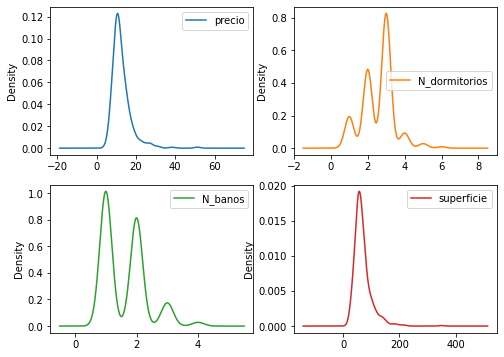

In [ ]:
data.plot(kind='kde',subplots=True,layout=(2,2),sharex=False,figsize=(8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5322c33940>,
      dtype=object)

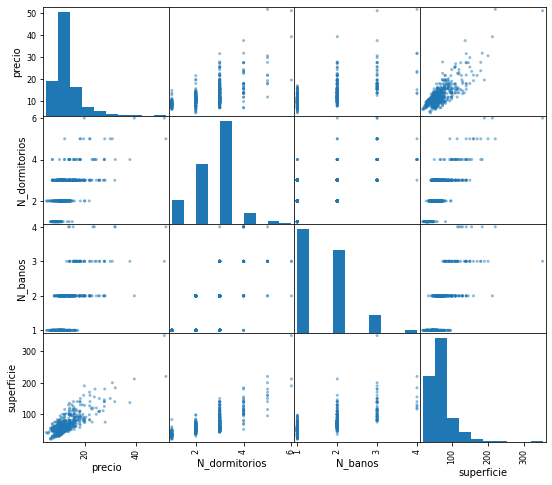

In [ ]:
scatter_matrix(data,figsize=(9,8))

Esta matriz de graficas es la mejor descripción y revelan la verdad detras de estos datos. En el grafico y=precio,X=superficie se ve una relación positiva (que anteriormente se vio en el $R^2$)

precio              AxesSubplot(0.125,0.536818;0.352273x0.343182)
N_dormitorios    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
N_banos                AxesSubplot(0.125,0.125;0.352273x0.343182)
superficie          AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

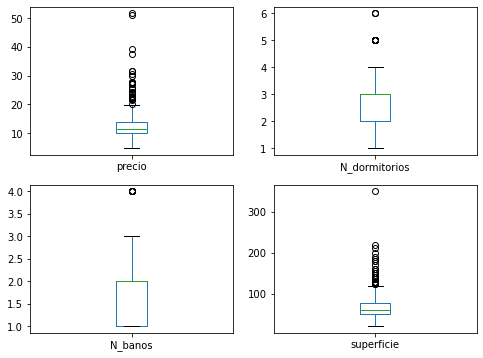

In [ ]:
data.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False,figsize=(8,6))

In [ ]:
data.corr()

,precio,N_dormitorios,N_banos,superficie
precio,1.000000,0.566154,0.629223,0.809474
N_dormitorios,0.566154,1.000000,0.518845,0.712803
N_banos,0.629223,0.518845,1.000000,0.701080
superficie,0.809474,0.712803,0.701080,1.000000


*#Acá podemos ver que la variable que es mas explicativa es la superficie, dando un R^2 de 0.809. Esto quiere decir  que las personas (en base a estos datos) prefieren por sobre todo la cantidad de espacio en el que van a vivir. Siendo el promedio en las muestra de 70 mts cuadrados para una casa promedio.**

In [ ]:
X=np.column_stack([np.ones_like(data.superficie),data.superficie,data.N_dormitorios,data.N_banos])
X_2=np.column_stack([np.ones_like(data.superficie),data.superficie,data.superficie**2,data.N_dormitorios,data.N_banos])
X_3=np.column_stack([np.ones_like(data.superficie),data.superficie,data.N_dormitorios,data.N_banos,data.N_dormitorios/data.N_banos])

NameError: ignored

*Acá Se hacen 3 regresiones; X_1=Las variables superficie,dormitorios,baños,X_2; superficie, superficie al cuadrado, numero de dormitorios y numero de bañños. X_3;superficie,numero de baños y un coeficiente entre la division dormitorios/baño. *

In [ ]:
ECM1=0
ECM2=0
ECM3=0
for i in range(1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,data.precio,test_size=0.2,random_state=i)
    model_sk=linear_model.LinearRegression()
    model_sk.fit(X_train,Y_train)
    Y_sk=model_sk.predict(X_test)
    ECM_1=np.mean((Y_test-Y_sk)**2)
    ECM1=ECM1+ECM_1
    
    X_2_train,X_2_test,Y_2_train,Y_2_test=train_test_split(X_2,data.precio,test_size=0.2,random_state=i)
    model_sk_2=linear_model.LinearRegression()
    model_sk_2.fit(X_2_train,Y_2_train)
    Y_sk_2=model_sk_2.predict(X_2_test)
    ECM_2=np.mean((Y_2_test-Y_sk_2)**2)
    ECM2=ECM2+ECM_2
    
    X_3_train,X_3_test,Y_3_train,Y_3_test=train_test_split(X_3,data.precio,test_size=0.2,random_state=i)
    model_sk_3=linear_model.LinearRegression()
    model_sk_3.fit(X_3_train,Y_3_train)
    Y_sk_3=model_sk_3.predict(X_3_test)
    ECM_3=np.mean((Y_3_test-Y_sk_3)**2)
    ECM3=ECM3+ECM_3
    
print(ECM1/100,ECM2/100,ECM3/100)
    


NameError: ignored

*****CONCLUSION: Dadas los datos, la mejor variable explicativa es sin duda la superficie. Los numeros de dormitorios y baños aportan 
tambien al precio pero en menor medida.Al hacer un scatterplot, vemos la correlacion positiva siendo que modelo predictor que mejor 
se ajusta es un polinomio de grado 2, aquella regresión con el "raw data", definida como con la variable superficie,numero de baños y dormitorios
 sin modificar y el modelo que mejor predice los precios.*****